In [55]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
import scienceplots
plt.style.use(['science', 'notebook', 'grid'])

In [56]:
def find_closest_centroids(X: np.ndarray, centroids: np.ndarray) -> np.ndarray:
    m = X.shape[0]
    c = np.zeros(m)
    k = centroids.shape[0]
    for i in range(m):
        dist = []
        for j in range(k):
            dist.append(np.linalg.norm(X[i] - centroids[j]))
        c[i] = np.argmin(dist)
    return c

In [57]:
X = np.load("./ex7_X.npy")

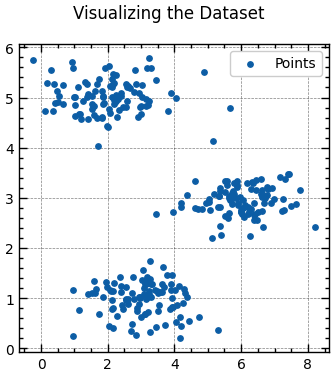

In [58]:
fig, axes = plt.subplots(1, 1, figsize=(4, 4))
axes.tick_params(axis="both", labelsize=10)
fig.suptitle("Visualizing the Dataset")
plt.scatter(X[:,0], X[:,1], marker="o", s=15, label="Points")
axes.legend(fontsize=10)

In [59]:
# Select an initial set of centroids (3 Centroids)
initial_centroids = np.array([[3,3], [6,2], [8,5]])

# Find closest centroids using initial_centroids
idx = find_closest_centroids(X, initial_centroids)

# Print closest centroids for the first three elements
print("First three elements in idx are:", idx[:3])


First three elements in idx are: [0. 2. 1.]


In [60]:
def compute_centroids(X, idx, K):
    centroids = np.zeros(shape=(K, len(X[0])))
    m = X.shape[0]
    for i in range(K):
        points = X[idx==i]
        centroids[i] = np.mean(points, axis=0)
    return centroids

In [61]:
K = 3
centroids = compute_centroids(X, idx, K)

print("The centroids are:", centroids)


The centroids are: [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


In [62]:
def run_kMeans(X, initial_centroids, max_iters=10):
    K = initial_centroids.shape[0]
    new_centroids = initial_centroids
    for i in range(max_iters):
        idx = find_closest_centroids(X, new_centroids)
        new_centroids = compute_centroids(X, idx, K)
    return new_centroids, idx

In [63]:
final_centroids, final_idx = run_kMeans(X, initial_centroids)

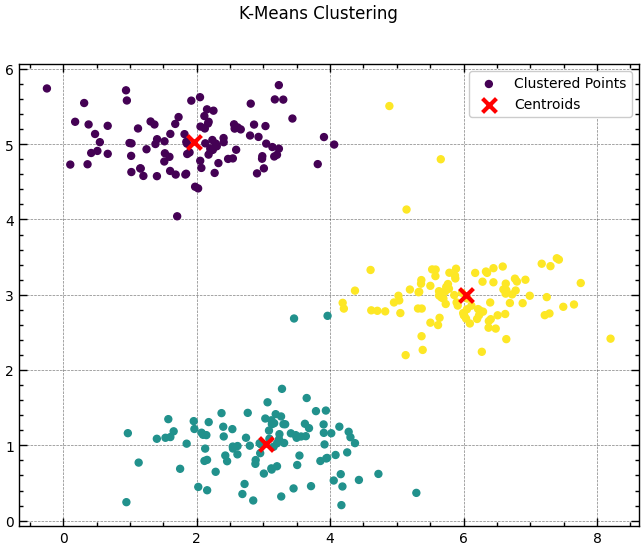

In [64]:
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
axes.tick_params(axis="both", labelsize=10)
fig.suptitle("K-Means Clustering")
plt.scatter(X[:,0], X[:,1], marker="o", s=25, label="Clustered Points", c=final_idx)
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], c="red", marker="x", s=100, lw=3, label="Centroids")
axes.legend(fontsize=10)

In [65]:
def kMeans_init_centroids(X, K):
    randidx = np.random.permutation(X)
    return randidx[:K]

In [115]:
original_img = plt.imread("./dean_winc.jpg")

Text(0.5, 1.0, 'Original 500 by 500 Image')

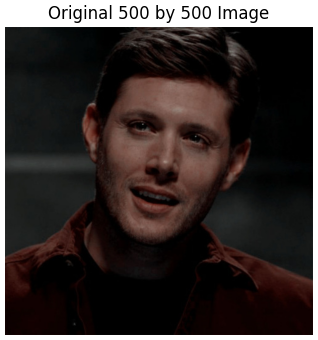

In [116]:
fig, axes = plt.subplots(1, 1, figsize=(4, 4))
axes.imshow(original_img)
axes.set_axis_off()
axes.set_title(f"Original {original_img.shape[0]} by {original_img.shape[1]} Image", fontsize=12)

In [117]:
img_flat = original_img.reshape(original_img.shape[0]*original_img.shape[1], 3)/255

In [118]:
rgb_data = np.c_[img_flat[:, 0], img_flat[:, 1], img_flat[:, 2]]

In [197]:
initial_centroids = kMeans_init_centroids(rgb_data, 16)
final_centroids, final_idx = run_kMeans(rgb_data, initial_centroids, 1)

In [200]:
final_img = np.zeros_like(img_flat)
for i in range(final_img.shape[0]):
    final_img[i] = final_centroids[int(final_idx[i])]

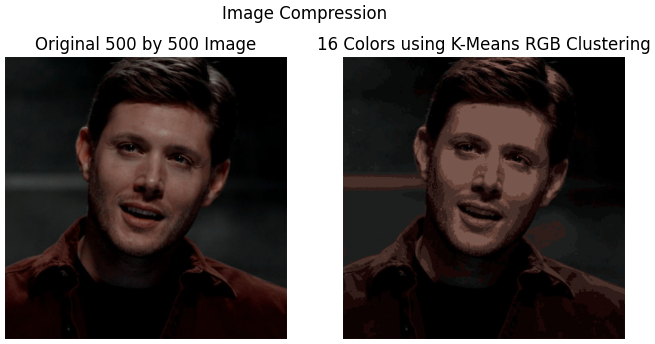

In [202]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle("Image Compression")
axes[0].imshow(original_img)
axes[0].set_axis_off()
axes[0].set_title(f"Original {original_img.shape[0]} by {original_img.shape[1]} Image", fontsize=12)
axes[1].imshow(final_img.reshape(original_img.shape[0], original_img.shape[1], 3))
axes[1].set_axis_off()
axes[1].set_title(f"16 Colors using K-Means RGB Clustering", fontsize=12)
fig.savefig("./dean_winc_compressed_16C.png", dpi=200)